#**Fundos Imobiliários - Alison Sousa**
Execute cada célula oculta ou clique na seta ">", para ter acesso aos resultados dos Fundos.
Assim, poderá observar os resultados ou cada célula irá exportar um arquivo xlsx usado para melhor visualização.


# **Execute para acessar detalhes de RBRR11, RBRY11 e RPRI11**


In [ ]:
import pandas as pd
from google.colab import files

# Caminho para o arquivo
file_path = '/content/drive/MyDrive/Colab Notebooks/dados_mercado.txt'

# Lendo o arquivo de texto como um DataFrame, utilizando ';' como separador
df = pd.read_csv(file_path, delimiter=';')

# Códigos de negociação a serem pesquisados
codigos = ["RBRR11", "RBRY11", "RPRI11"]

# Filtrando o DataFrame e criando uma cópia independente
df_filtrado = df[df['codigo_de_negociacao'].isin(codigos)].copy()

# Substituindo ponto por vírgula nas colunas numéricas
colunas_numericas = df_filtrado.select_dtypes(include=['float64', 'int64']).columns
for coluna in colunas_numericas:
    df_filtrado[coluna] = df_filtrado[coluna].apply(lambda x: str(x).replace('.', ','))

# Função para salvar e baixar o arquivo
def salvar_e_baixar(df):
    caminho_saida_xlsx = 'Detalhes_fundos.xlsx'
    df.to_excel(caminho_saida_xlsx, index=False)
    files.download(caminho_saida_xlsx)

# Chamando a função para salvar e baixar o arquivo
salvar_e_baixar(df_filtrado)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Execute para acessar os resultados de RBRR11, RBRY11 e RPRI11**


In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

# Caminho para o arquivo
file_path = '/content/drive/MyDrive/Colab Notebooks/dados_mercado.txt'

# Lendo o arquivo
df = pd.read_csv(file_path, delimiter=';')  # Ajuste do delimitador em ;
df['data_do_pregao'] = pd.to_datetime(df['data_do_pregao'])

# Códigos de negociação a serem pesquisados
codigos = ["RBRR11", "RBRY11", "RPRI11"]

# Dicionário para armazenar os resultados
resultados = {}

# Função para obter a descrição da semana
def semana_descricao(data):
    mes = data.strftime("%B")
    semana_do_mes = np.floor((data.day - 1) / 7) + 1
    return f"{int(semana_do_mes)}ª semana de {mes}"

# Processamento para cada fundo
for codigo in codigos:
    df_codigo = df[df['codigo_de_negociacao'] == codigo]
    df_2023 = df_codigo[df_codigo['data_do_pregao'].dt.year == 2023].copy()

    # Análises de preço e volume
    preco_abertura = df_2023[df_2023['data_do_pregao'] == '2023-01-02']['preco_abertura'].iloc[0]
    preco_fechamento_final = df_2023[df_2023['data_do_pregao'] == '2023-12-28']['preco_fechamento'].iloc[0]
    media_preco_fechamento = df_2023['preco_fechamento'].mean()
    media_volume_negociado = df_2023['volume_negociado'].mean()
    volume_total_2023 = df_2023['volume_negociado'].sum()

    # Análise de variação percentual
    df_2023['variacao_percentual'] = df_2023['preco_fechamento'].pct_change() * 100
    dia_maior_valorizacao = df_2023.loc[df_2023['variacao_percentual'].idxmax()]
    dia_maior_desvalorizacao = df_2023.loc[df_2023['variacao_percentual'].idxmin()]

    # Análise semanal e mensal/trimestral
    df_2023['semana_descricao'] = df_2023['data_do_pregao'].apply(semana_descricao)
    volume_semanal = df_2023.groupby('semana_descricao')['volume_negociado'].sum()
    maior_crescimento_semana = volume_semanal.pct_change().idxmax(), volume_semanal.pct_change().max()

    df_2023['mes'] = df_2023['data_do_pregao'].dt.month
    df_2023['trimestre'] = df_2023['data_do_pregao'].dt.to_period('Q')
    volume_por_mes = df_2023.groupby('mes')['volume_negociado'].sum()
    mes_maior_volume = volume_por_mes.idxmax()
    maior_volume_mes = volume_por_mes.max()
    volume_por_trimestre = df_2023.groupby('trimestre')['volume_negociado'].sum()
    trimestre_maior_volume = volume_por_trimestre.idxmax()
    maior_volume_trimestre = volume_por_trimestre.max()

    variacao_mensal = df_2023.groupby('mes')['preco_fechamento'].agg(['min', 'max'])
    variacao_mensal['variação'] = variacao_mensal['max'] - variacao_mensal['min']
    mes_maior_variacao = variacao_mensal['variação'].idxmax()
    maior_variacao = variacao_mensal['variação'].max()

    # Armazenando os resultados no dicionário
    resultados[codigo] = {
        'Preço de Abertura (02/01/2023)': f"{preco_abertura:.2f}".replace('.', ',') if isinstance(preco_abertura, float) else preco_abertura,
        'Preço de Fechamento (28/12/2023)': f"{preco_fechamento_final:.2f}".replace('.', ',') if isinstance(preco_fechamento_final, float) else preco_fechamento_final,
        'Média do Preço de Fechamento': f"{media_preco_fechamento:.2f}".replace('.', ','),
        'Média do Volume Negociado': f"{media_volume_negociado:.2f}".replace('.', ','),
        'Mês com Maior Variação': mes_maior_variacao,
        'Maior Variação de Preço': f"{maior_variacao:.2f}".replace('.', ','),
        'Volume Total Negociado em 2023': f"{volume_total_2023:.2f}".replace('.', ','),
        'Mês com Maior Volume Negociado': mes_maior_volume,
        'Maior Volume Negociado no Mês': f"{maior_volume_mes:.2f}".replace('.', ','),
        'Trimestre com Maior Volume Negociado': str(trimestre_maior_volume),
        'Maior Volume Negociado no Trimestre': f"{maior_volume_trimestre:.2f}".replace('.', ','),
        'Dia com Maior Valorização': dia_maior_valorizacao['data_do_pregao'].strftime("%d/%m/%Y"),
        'Variação na Maior Valorização': f"{dia_maior_valorizacao['variacao_percentual']:.2f}".replace('.', ','),
        'Dia com Maior Desvalorização': dia_maior_desvalorizacao['data_do_pregao'].strftime("%d/%m/%Y"),
        'Variação na Maior Desvalorização': f"{dia_maior_desvalorizacao['variacao_percentual']:.2f}".replace('.', ','),
        'Semana com Maior Crescimento no Volume Negociado': maior_crescimento_semana[0],
        'Crescimento no Volume Negociado': f"{maior_crescimento_semana[1] * 100:.2f}".replace('.', ','),
    }

 # Baixando o arquivo para xlsx
 # Convertendo o dicionário em um DataFrame
df_resultados = pd.DataFrame.from_dict(resultados, orient='index')

# Adicionando uma coluna com o nome do fundo (índice do DataFrame)
df_resultados['Fundo'] = df_resultados.index

# Reorganizando as colunas para que 'Fundo' seja a primeira coluna
colunas = ['Fundo'] + [col for col in df_resultados if col != 'Fundo']
df_resultados = df_resultados[colunas]

# Formatar cada coluna numérica, substituindo ponto por vírgula
for col in df_resultados.columns[1:]:  # Excluindo a primeira coluna (nome do fundo)
    if pd.api.types.is_numeric_dtype(df_resultados[col]):
        df_resultados[col] = df_resultados[col].apply(lambda x: f"{x:.2f}".replace('.', ','))

# Definindo o nome do arquivo Excel
output_file_name = 'Resultados_fundos.xlsx'

# Salvando o DataFrame formatado em um arquivo Excel temporário no Google Colab
df_resultados.to_excel(output_file_name, index=False)

# Baixando automaticamente o arquivo para sua máquina local
files.download(output_file_name)

#Exibindo os resultados
print("Resumo dos Resultados:")
for codigo, dados in resultados.items():
    print(f"\nCódigo: {codigo}")
    for descricao, valor in dados.items():
        print(f"{descricao}: {valor}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Resumo dos Resultados:

Código: RBRR11
Preço de Abertura (02/01/2023): 84,22
Preço de Fechamento (28/12/2023): 89,14
Média do Preço de Fechamento: 88,08
Média do Volume Negociado: 3658771,88
Mês com Maior Variação: 1
Maior Variação de Preço: 6,87
Volume Total Negociado em 2023: 907375425,20
Mês com Maior Volume Negociado: 1
Maior Volume Negociado no Mês: 92512353,46
Trimestre com Maior Volume Negociado: 2023Q3
Maior Volume Negociado no Trimestre: 248776543,15
Dia com Maior Valorização: 28/04/2023
Variação na Maior Valorização: 3,43
Dia com Maior Desvalorização: 01/08/2023
Variação na Maior Desvalorização: -3,02
Semana com Maior Crescimento no Volume Negociado: 5ª semana de June
Crescimento no Volume Negociado: 163,52

Código: RBRY11
Preço de Abertura (02/01/2023): 98,10
Preço de Fechamento (28/12/2023): 99,75
Média do Preço de Fechamento: 97,70
Média do Volume Negociado: 1589990,14
Mês com Maior Variação: 5
Maior Variação de Preço: 6,99
Volume Total Negociado em 2023: 394317555,43
Mês 

# **Execute para acessar os resultados do agregado de RBRR11, RBRY11 e RPRI11**

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from google.colab import files

def semana_descricao(data):
    mes = data.strftime("%B")
    semana_do_mes = np.floor((data.day - 1) / 7) + 1
    return f"{int(semana_do_mes)}ª semana de {mes}"

# Caminho para o arquivo
file_path = '/content/drive/MyDrive/Colab Notebooks/dados_mercado.txt'

# Lendo o arquivo
df = pd.read_csv(file_path, delimiter=';')  # Ajuste do delimitador em ;
df['data_do_pregao'] = pd.to_datetime(df['data_do_pregao'])

# Códigos de negociação dos fundos
codigos = ["RBRR11", "RBRY11", "RPRI11"]

# Filtrando os dados para os códigos especificados e para o ano de 2023
df_codigos = df[df['codigo_de_negociacao'].isin(codigos) & (df['data_do_pregao'].dt.year == 2023)].copy()

# Adicionando coluna de mês, trimestre e semana
df_codigos['mes'] = df_codigos['data_do_pregao'].dt.month
df_codigos['trimestre'] = df_codigos['data_do_pregao'].dt.to_period('Q')
df_codigos['semana_descricao'] = df_codigos['data_do_pregao'].apply(semana_descricao)

# Realizando as análises agregadas
resultados_agregados = {}

# Análises de preço e volume
preco_abertura_media = df_codigos.groupby('codigo_de_negociacao')['preco_abertura'].first().mean()
preco_fechamento_final_media = df_codigos.groupby('codigo_de_negociacao')['preco_fechamento'].last().mean()
media_preco_fechamento = df_codigos['preco_fechamento'].mean()
media_volume_negociado = df_codigos['volume_negociado'].mean()
volume_total_2023 = df_codigos['volume_negociado'].sum()

# Análise de variação percentual
df_codigos['variacao_percentual'] = df_codigos['preco_fechamento'].pct_change() * 100
dia_maior_valorizacao_media = df_codigos.loc[df_codigos['variacao_percentual'].idxmax()]['data_do_pregao']
maior_valorizacao_media = df_codigos['variacao_percentual'].max()
dia_maior_desvalorizacao_media = df_codigos.loc[df_codigos['variacao_percentual'].idxmin()]['data_do_pregao']
maior_desvalorizacao_media = df_codigos['variacao_percentual'].min()

#Análise semanal, mensal e trimestral
volume_por_mes = df_codigos.groupby('mes')['volume_negociado'].sum()
mes_maior_volume = volume_por_mes.idxmax()
maior_volume_mes = volume_por_mes.max()

volume_por_trimestre = df_codigos.groupby('trimestre')['volume_negociado'].sum()
trimestre_maior_volume = volume_por_trimestre.idxmax()
maior_volume_trimestre = volume_por_trimestre.max()

volume_semanal = df_codigos.groupby('semana_descricao')['volume_negociado'].sum()
maior_crescimento_semana = volume_semanal.pct_change().idxmax(), volume_semanal.pct_change().max()

variacao_mensal = df_codigos.groupby('mes')['preco_fechamento'].agg(['min', 'max'])
variacao_mensal['variação'] = variacao_mensal['max'] - variacao_mensal['min']
mes_maior_variacao = variacao_mensal['variação'].idxmax()
maior_variacao = variacao_mensal['variação'].max()

#Formatando os resultados para duas casas decimais e com vírgula como separador decimal
resultados_agregados = {
'Preço Médio de Abertura (02/01/2023)': f"{preco_abertura_media:.2f}".replace('.', ','),
'Preço Médio de Fechamento Final (28/12/2023)': f"{preco_fechamento_final_media:.2f}".replace('.', ','),
'Média do Preço de Fechamento': f"{media_preco_fechamento:.2f}".replace('.', ','),
'Média do Volume Negociado': f"{media_volume_negociado:.2f}".replace('.', ','),
'Volume Total Negociado em 2023': f"{volume_total_2023:.2f}".replace('.', ','),
'Mês com Maior Volume Negociado': mes_maior_volume,
'Maior Volume Negociado no Mês': f"{maior_volume_mes:.2f}".replace('.', ','),
'Trimestre com Maior Volume Negociado': str(trimestre_maior_volume),
'Maior Volume Negociado no Trimestre': f"{maior_volume_trimestre:.2f}".replace('.', ','),
'Dia com maior valorização média': dia_maior_valorizacao_media.strftime('%d/%m/%Y'),
'Variação na maior valorização média': f"{maior_valorizacao_media:.2f}".replace('.', ','),
'Dia com maior desvalorização média': dia_maior_desvalorizacao_media.strftime('%d/%m/%Y'),
'Variação na maior desvalorização média': f"{maior_desvalorizacao_media:.2f}".replace('.', ','),
'Semana com Maior Crescimento no Volume Negociado': maior_crescimento_semana[0],
'Crescimento no Volume Negociado': f"{maior_crescimento_semana[1] * 100:.2f}".replace('.', ',') + '%',
'Mês com Maior Variação de Preço': mes_maior_variacao,
'Maior Variação de Preço no Mês': f"{maior_variacao:.2f}".replace('.', ',')
}

#Convertendo os resultados agregados em um DataFrame
df_resultados_agregados = pd.DataFrame([resultados_agregados])

#Salvando o DataFrame em um arquivo Excel
output_file_name = 'Resultados_Agregados.xlsx'
df_resultados_agregados.to_excel(output_file_name, index=False)

# Baixando automaticamente o arquivo para sua máquina local
files.download(output_file_name)


#Exibindo os resultados agregados
print("Resumo dos Resultados Agregados:")
for descricao, valor in resultados_agregados.items():
  print(f"{descricao}: {valor}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Resumo dos Resultados Agregados:
Preço Médio de Abertura (02/01/2023): 94,07
Preço Médio de Fechamento Final (28/12/2023): 97,56
Média do Preço de Fechamento: 94,43
Média do Volume Negociado: 1856288,86
Volume Total Negociado em 2023: 1381078910,52
Mês com Maior Volume Negociado: 10
Maior Volume Negociado no Mês: 132184637,53
Trimestre com Maior Volume Negociado: 2023Q3
Maior Volume Negociado no Trimestre: 365373706,61
Dia com maior valorização média: 21/12/2023
Variação na maior valorização média: 18,90
Dia com maior desvalorização média: 23/03/2023
Variação na maior desvalorização média: -16,90
Semana com Maior Crescimento no Volume Negociado: 3ª semana de January
Crescimento no Volume Negociado: 93,67%
Mês com Maior Variação de Preço: 12
Maior Variação de Preço no Mês: 18,30


# **Gráficos de RBRR11, RBRY11 e RPRI11**

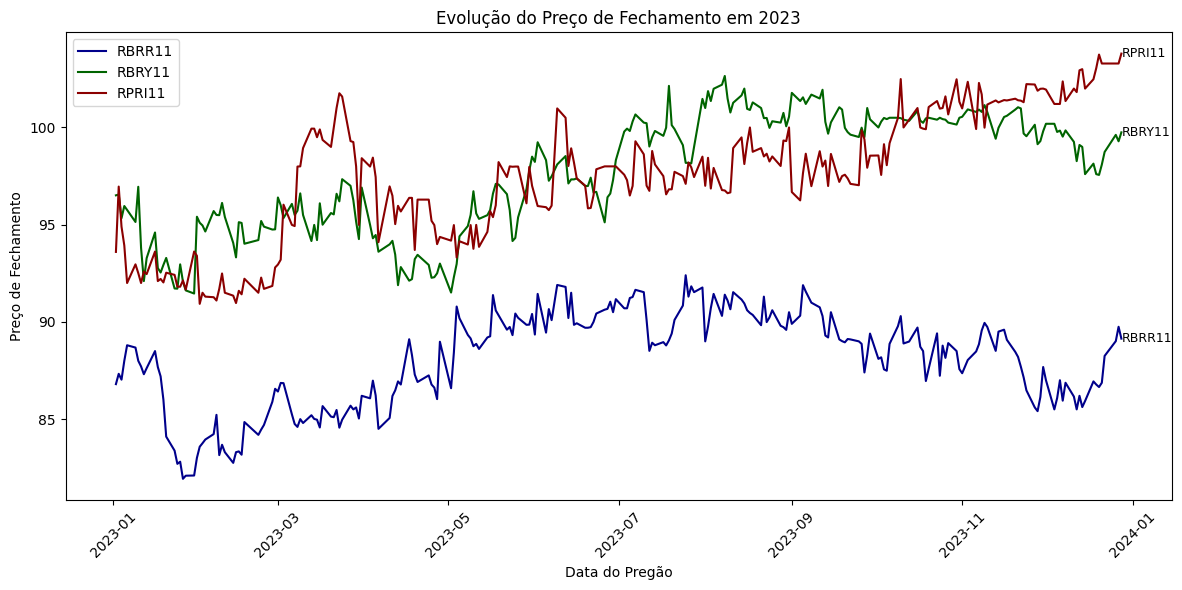

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho para o arquivo
file_path = '/content/drive/MyDrive/Colab Notebooks/dados_mercado.txt'

# Lendo o arquivo
df = pd.read_csv(file_path, delimiter=';')  # Ajuste do delimitador em ;

# Convertendo a coluna 'data_do_pregao' para o tipo datetime
df['data_do_pregao'] = pd.to_datetime(df['data_do_pregao'])

# Filtrando o DataFrame para o ano de 2023
df_2023 = df[df['data_do_pregao'].dt.year == 2023]

# Códigos de negociação a serem pesquisados
codigos = ["RBRR11", "RBRY11", "RPRI11"]

# Iniciando a plotagem do gráfico
plt.figure(figsize=(12, 6))

# Cores para cada linha
cores = ['darkblue', 'darkgreen', 'darkred']

# Criando gráfico para cada código de negociação
for codigo, cor in zip(codigos, cores):
    df_filtrado = df_2023[df_2023['codigo_de_negociacao'] == codigo]
    plt.plot(df_filtrado['data_do_pregao'], df_filtrado['preco_fechamento'], label=codigo, color=cor)
    # Etiquetando a última ponta da linha com o nome do fundo
    plt.text(df_filtrado['data_do_pregao'].iloc[-1],
             df_filtrado['preco_fechamento'].iloc[-1],
             codigo,
             fontsize=9,
             verticalalignment='center')

# Configurando o gráfico
plt.title('Evolução do Preço de Fechamento em 2023')
plt.xlabel('Data do Pregão')
plt.ylabel('Preço de Fechamento')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Mostrando o gráfico
plt.show()


# **Execute para acessar outras estatísticas**

In [ ]:
import pandas as pd
from google.colab import files

# A df já tenha sido definido executado dos códigos dos fundos ["RBRR11", "RBRY11", "RPRI11"]

# Filtrando os dados para o ano de 2023
df_2023 = df[df['data_do_pregao'].dt.year == 2023]

# Inicializando um DataFrame para armazenar as estatísticas de risco
risco_fundos = pd.DataFrame(columns=['Codigo', 'Volatilidade', 'Coeficiente_Variacao', 'Desvio_Padrao'])

for codigo in codigos:
    # Filtrando o DataFrame para o fundo atual e criando uma cópia
    df_fundo = df_2023[df_2023['codigo_de_negociacao'] == codigo].copy()

    # Calculando a variação percentual diária de preço
    df_fundo['retorno_percentual'] = df_fundo['preco_fechamento'].pct_change() * 100

    # Calculando a volatilidade (desvio padrão dos retornos percentuais)
    volatilidade = df_fundo['retorno_percentual'].std()

    # Calculando o coeficiente de variação
    coef_variacao = volatilidade / df_fundo['retorno_percentual'].mean()

    # Preparando os dados para concatenação
    dados_fundo = pd.DataFrame({
        'Codigo': [codigo],
        'Volatilidade': [volatilidade],
        'Coeficiente_Variacao': [coef_variacao],
        'Desvio_Padrao': [df_fundo['preco_fechamento'].std()]
    })

    # Concatenando com o DataFrame principal
    risco_fundos = pd.concat([risco_fundos, dados_fundo], ignore_index=True)

#Salvando os resultados em um arquivo Excel
output_file_name = 'Risco_Fundos.xlsx'
risco_fundos.to_excel(output_file_name, index=False)
files.download(output_file_name)

# Exibindo resultados
print(risco_fundos)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   Codigo  Volatilidade  Coeficiente_Variacao  Desvio_Padrao
0  RBRR11      0.998025             63.456450       2.423014
1  RBRY11      0.884950             51.268854       2.944284
2  RPRI11      1.196770             24.427462       3.250230


# **Gráficos de Riscos**

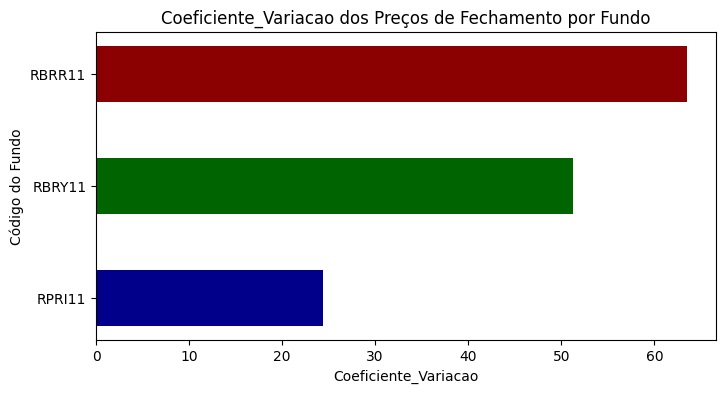

In [ ]:
import matplotlib.pyplot as plt

# Ordenando o DataFrame por Coeficiente_Variacao em ordem Crescente
risco_fundos = risco_fundos.sort_values(by='Coeficiente_Variacao', ascending=True)

# Cores para cada fundo
cores = ['darkblue', 'darkgreen', 'darkred']

# Criando o gráfico de barras horizontal
plt.figure(figsize=(8, 4))  # Ajustando o tamanho do gráfico
plt.barh(risco_fundos['Codigo'], risco_fundos['Coeficiente_Variacao'], color=cores, height=0.5)  # Barras horizontais e mais finas

# Adicionando títulos e etiquetas
plt.title('Coeficiente_Variacao dos Preços de Fechamento por Fundo')
plt.ylabel('Código do Fundo')
plt.xlabel('Coeficiente_Variacao')

# Mostrando o gráfico
plt.show()
